<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/Covid_19_geometric_mean_known_cases_and_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
full_data = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")

In [0]:
TIPPING_POINT = 200

In [0]:
from scipy.stats.mstats import gmean 
def geometric(total_cases):
  rolling_geometric_mean = []
  for s in np.arange(2,len(total_cases)):
    a = list(np.array(total_cases.iloc[0:s].fillna(0.1)))
    growth_rate = [t/s for s, t in zip(a, a[1:]) if s is not 0]
    rolling_geometric_mean.append(gmean([t/s for s, t in zip(a, a[1:])]))
  return rolling_geometric_mean

In [0]:
list_countries = ['France', 'Italy', 'Spain']

In [0]:
total_cases = {}
total_deaths = {}
for country in list_countries:
  total_cases[country] = full_data.query(f"location == '{country}' & total_cases > @TIPPING_POINT")["total_cases"]
  total_deaths[country] = full_data.query(f"location == '{country}' & total_cases > @TIPPING_POINT")["total_deaths"]

In [0]:
rgm_total_cases = {}
rgm_total_deaths = {}
for country in list_countries:
  rgm_total_cases[country] = geometric(total_cases[country])
  rgm_total_deaths[country] = geometric(total_deaths[country])

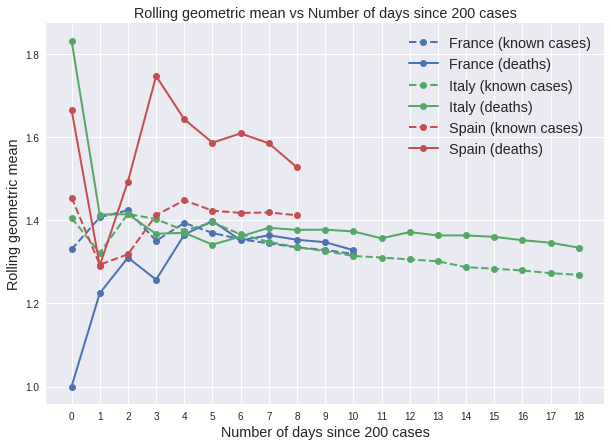

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

for i, country in enumerate(list_countries):
  plt.plot(rgm_total_cases[country], linewidth=2, linestyle='dashed', color=f'C{i}', marker='o', label=f'{country} (known cases)')
  plt.plot(rgm_total_deaths[country], linewidth=2, linestyle='solid', color=f'C{i}', marker='o', label=f'{country} (deaths)')
ax.set_title(f'Rolling geometric mean vs Number of days since {TIPPING_POINT} cases', fontsize='x-large')
ax.set_xlabel(f'Number of days since {TIPPING_POINT} cases', fontsize='x-large')
ax.set_ylabel('Rolling geometric mean', fontsize='x-large')
ax.set_xticks(np.arange(len(rgm_total_cases["Italy"])))
plt.legend(fontsize='x-large')
plt.show()

In [9]:
for country in list_countries:
  print(f'{country} geometric mean (known cases): {rgm_total_cases[country][-1]}')
  print(f'{country} geometric mean (deaths): {rgm_total_deaths[country][-1]}')

France geometric mean (known cases): 1.3193263205707533
France geometric mean (deaths): 1.3285011832111675
Italy geometric mean (known cases): 1.268976591140974
Italy geometric mean (deaths): 1.3344126295901855
Spain geometric mean (known cases): 1.412523541175725
Spain geometric mean (deaths): 1.5277292930052806
